In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(context="paper", rc={"font.size": 10})

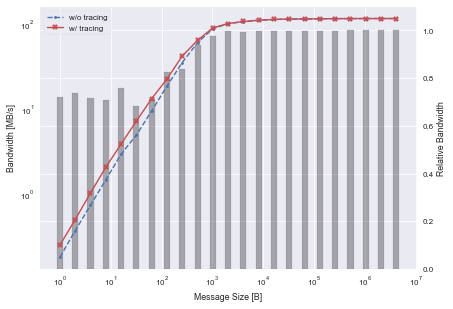

In [2]:
data = np.loadtxt("liboxton_bandwidth.csv", delimiter=",", skiprows=1)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax2.yaxis.tick_left()
ax2.yaxis.set_label_position("left")
ax2.set_ylabel("Bandwidth [MB/s]")
ax2.set_xscale("log")
ax2.set_yscale("log")

pal = sns.color_palette()

ax2.plot(data[:,0], data[:,2], color=pal[0], ls="--", marker=".", label="w/o tracing")
ax2.plot(data[:,0], data[:,1], color=pal[2], marker="X", label="w/ tracing")
ax2.legend(frameon=True)
ax2.grid(False)

ax1.yaxis.tick_right()
ax1.yaxis.set_label_position("right")
ax1.set_ylabel("Relative Bandwidth")
ax1.set_yscale("linear")
ax1.set_ylim((0,1.1))
ax1.set_xlabel("Message Size [B]")

width = 6e-2
x = data[:,0]
y = data[:,2] / data[:,1]

for i in range(len(x)):
    ax1.fill([10**(np.log10(x[i])-width), 10**(np.log10(x[i])-width), 10**(np.log10(x[i])+width), 10**(np.log10(x[i])+width)],
                 [0, y[i], y[i], 0],
                 color="k", alpha=0.3, zorder=10)

fig.tight_layout()
fig.savefig("bandwidth_overhead.pdf", bbox_inches="tight")

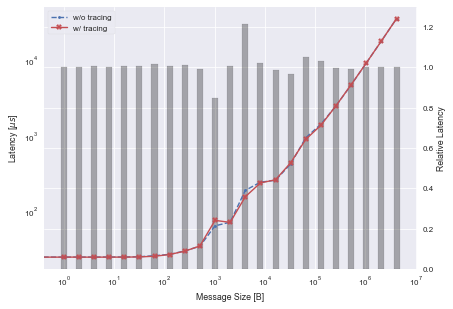

In [3]:
data = np.loadtxt("liboxton_latency.csv", delimiter=",", skiprows=1)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax2.yaxis.tick_left()
ax2.yaxis.set_label_position("left")
ax2.set_ylabel("Latency [$\mu s$]")
ax2.set_xscale("log")
ax2.set_yscale("log")

pal = sns.color_palette()

ax2.plot(data[:,0], data[:,2], color=pal[0], ls="--", marker=".", label="w/o tracing")
ax2.plot(data[:,0], data[:,1], color=pal[2], marker="X", label="w/ tracing")
ax2.legend(frameon=True)
ax2.grid(False)

ax1.yaxis.tick_right()
ax1.yaxis.set_label_position("right")
ax1.set_xlabel("Message Size [B]")
ax1.set_ylabel("Relative Latency")
ax1.set_yscale("linear")
ax1.set_ylim((0,1.3))

width = 6e-2
x = data[1:,0]
y = data[1:,2] / data[1:,1]

for i in range(len(x)):
    ax1.fill([10**(np.log10(x[i])-width), 10**(np.log10(x[i])-width), 10**(np.log10(x[i])+width), 10**(np.log10(x[i])+width)],
                 [0, y[i], y[i], 0],
                 color="k", alpha=0.3)
    
fig.tight_layout()
fig.savefig("latency_overhead.pdf", bbox_inches="tight")